In [ ]:
# Comment the following lines if you're not in colab:
from google.colab import drive
drive.mount('/content/drive')
# If you're in colab, cd to your own working directory here:
%cd ..//..//content//drive//MyDrive//Colab-Notebooks//HY-673-Tutorials//Tutorial-3

Mounted at /content/drive
/content/drive/MyDrive/Colab-Notebooks/HY-673-Tutorials/Tutorial-3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

seed = 42
np.random.seed(seed)

## <u>Question 2c</u>

In [ ]:
# mean vector of [X1,X2,X3]:
mu = np.asarray([1, -1, 0])
# covariance matrix of [X1,X2,X3]:
sigma = np.asarray([[1, -0.5, 0.8], [-0.5, 1, -0.8], [0.8, -0.5, 1]])

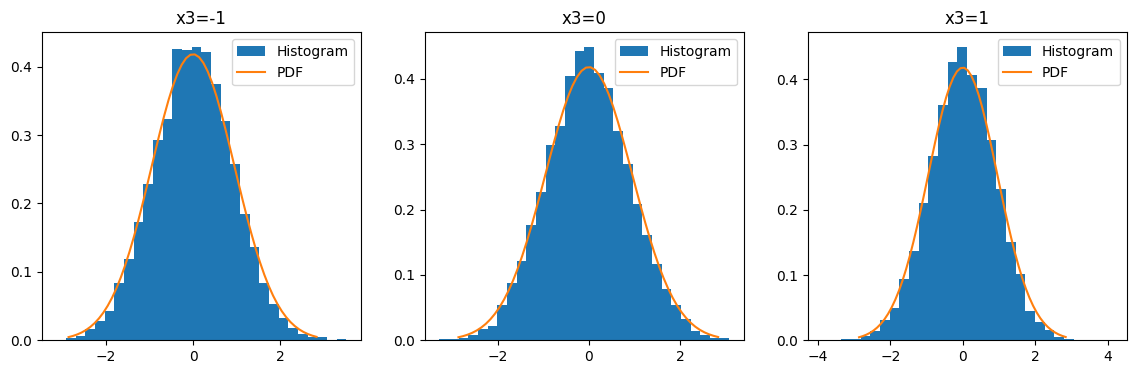

In [ ]:
# number of samples to estimate the empirical distribution of Y:
n = 10000

fig, ax = plt.subplots(1, 3, figsize=(14, 4))
for idx, x3 in enumerate([-1, 0, 1]):

    # parameters for the conditional distribution p(x1,x2|x3)
    # that we found analytically:
    mu_cond = mu[0:2] - (x3-mu[2])*sigma[0:2, 2]/sigma[2, 2]
    sigma_cond = sigma[0:2, 0:2] - np.outer(sigma[2, :2], sigma[2, :2])/sigma[2, 2]
    # find the L matrix through cholensky decomposition:
    l_cond = np.linalg.cholesky(sigma_cond)
    # sample from a standard normal:
    z = np.random.randn(n, 2)
    # produce Gaussian samples distributed as X1,X2|X3:
    x_cond = z @ l_cond + mu_cond
    # X1+X2|X3:
    y = x_cond.sum(axis=1)
    # parameters for the Y~p(x1+x2|x3):
    muY = mu_cond.sum()
    varY = sigma_cond.sum()
    sigmaY = np.sqrt(varY)
    # sampling range:
    y_range = np.arange(-3*sigmaY, 3*sigmaY, 0.1)
    # compute the PDF with the formula:
    pdfy = np.exp( -(y_range - muY)**2 / (2*sigmaY**2) ) / (sigmaY*np.sqrt(2*np.pi))
    # plot:
    ax[idx].hist(y, bins=30, density=True, label='Histogram')
    ax[idx].plot(y_range, pdfy, label='PDF')
    ax[idx].legend(loc="upper right")
    ax[idx].set_title(f'x3={x3}')

# plt.savefig('data/ex2c.pdf', bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()